In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.fftpack import fft, fftshift, ifft
#import scipy.io.wavfile as wav

In [2]:
adc_offset = -127.5
offset = 44
file1 = "NOAA15/station1_yagi_SDRSharp_20170312_060959Z_137650kHz_IQ.wav"
file2 = "NOAA15/station2_turnstile_SDRSharp_20170312_061008Z_137650000Hz_IQ.wav"
file3 = "NOAA15/SDRSharp_20190521_191501Z_137500000Hz_IQ.wav" #big file
data = np.memmap(file1, offset=offset)
#f1s, data2 = wav.read(file1, mmap=False)

In [3]:
def calFFT(sig):
    afft = fftshift(fft(sig))
    hx = np.abs(afft)
    return hx

#def calFFTPower(fft):
    

In [ ]:
time_a = time.time()
window = 2048000
iqdata = []
for slice in range(0, int(len(data) // (window * 2)) * window * 2, window*2):  # the -1 is because the slice could be less than the region we need to cut out for the out. xxx
    data_slice = adc_offset + (data[slice: slice + window * 2: 2]) + 1j * (adc_offset + data[slice + 1: slice + window * 2: 2])
    iqdata.extend(data_slice)
    print(slice, len(data)/2, slice / (len(data)), len(data_slice), len(iqdata))
    
iq = np.asarray(iqdata)
time_b = time.time()
print('Time:',time_b - time_a)
print('Len',len(iq), ' Type:', type(iq))

0 171933696.0 0.0 2048000 2048000
4096000 171933696.0 0.0119115685153421 2048000 4096000
8192000 171933696.0 0.0238231370306842 2048000 6144000
12288000 171933696.0 0.0357347055460263 2048000 8192000
16384000 171933696.0 0.0476462740613684 2048000 10240000
20480000 171933696.0 0.0595578425767105 2048000 12288000
24576000 171933696.0 0.0714694110920526 2048000 14336000
28672000 171933696.0 0.0833809796073947 2048000 16384000
32768000 171933696.0 0.0952925481227368 2048000 18432000
36864000 171933696.0 0.1072041166380789 2048000 20480000
40960000 171933696.0 0.119115685153421 2048000 22528000
45056000 171933696.0 0.1310272536687631 2048000 24576000
49152000 171933696.0 0.1429388221841052 2048000 26624000
53248000 171933696.0 0.1548503906994473 2048000 28672000
57344000 171933696.0 0.1667619592147894 2048000 30720000
61440000 171933696.0 0.1786735277301315 2048000 32768000
65536000 171933696.0 0.1905850962454736 2048000 34816000
69632000 171933696.0 0.2024966647608157 2048000 36864000
737

In [6]:
type(iq)

numpy.ndarray

# Spectrogram

In [56]:
#Manual Chunking Spectrogram
NFFT = 2048 #window size
chunk = 2048000
num_chunks = int(len(iq)/chunk)
fs = window

for i in range(num_chunks):
    fft_iq = calFFT(iq[i*chunk:(1+i)*chunk])
    freqs = np.linspace(0, fs, chunk)[0:int(fs/2)]
    Sxx_chunk = fft_iq/(np.amax(fft_iq)*1)
    
    if (i==10):
        break
        
    print(len(fft_iq), len(freqs), len(Sxx_chunk))
#times = [0, int(len(iq) // int(2 * fs))]

2048000 1024000 2048000
2048000 1024000 2048000
2048000 1024000 2048000
2048000 1024000 2048000
2048000 1024000 2048000
2048000 1024000 2048000
2048000 1024000 2048000
2048000 1024000 2048000
2048000 1024000 2048000
2048000 1024000 2048000


TypeError: Illegal arguments to pcolormesh; see help(pcolormesh)

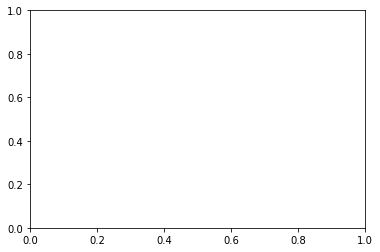

In [60]:
plt.pcolormesh(freqs, Sxx_chunk)

2048


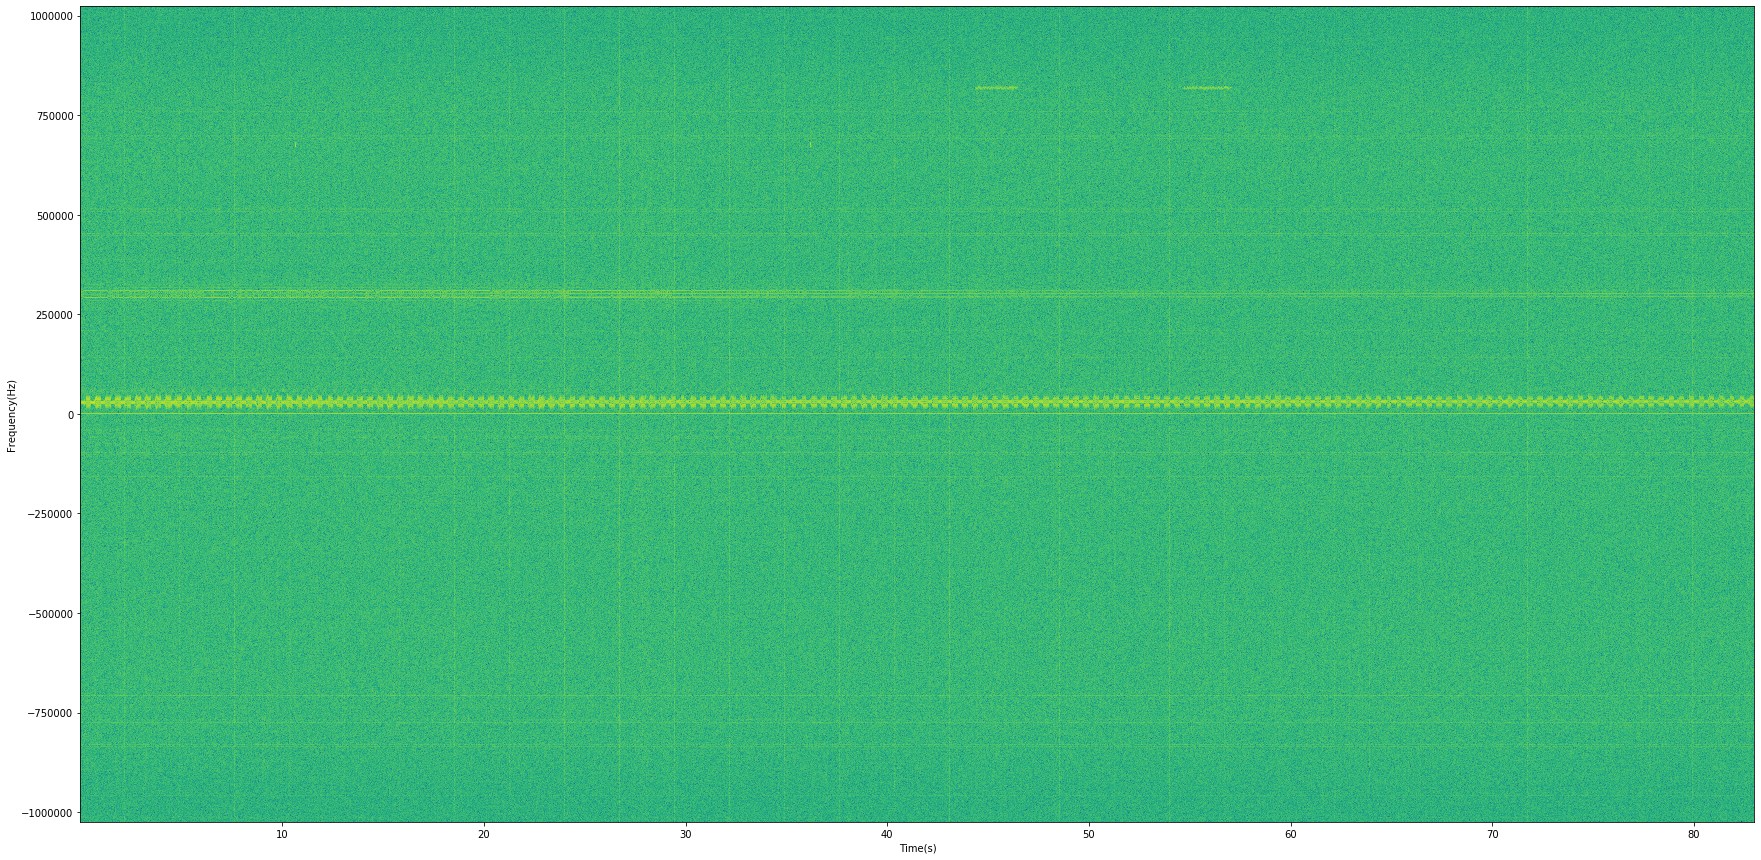

<Figure size 432x288 with 0 Axes>

In [9]:
fs = window
# NFFT = int(fs*0.0005)
noverlap = int(fs*0.0025) 
time_a = time.time()

plt.figure(figsize=(30,15))
plt.specgram(iqdata,NFFT=2048, Fs=fs)
plt.xlabel('Time(s)')
plt.ylabel('Frequency(KHz)')
# plt.ylim([2.5e5, 4e5])
plt.show()

In [4]:
time_b = time.time()
print('Time:',time_b - time_a)

Time:  1591708484.603253


## Scipy Spectrogram


1024 4464 1024


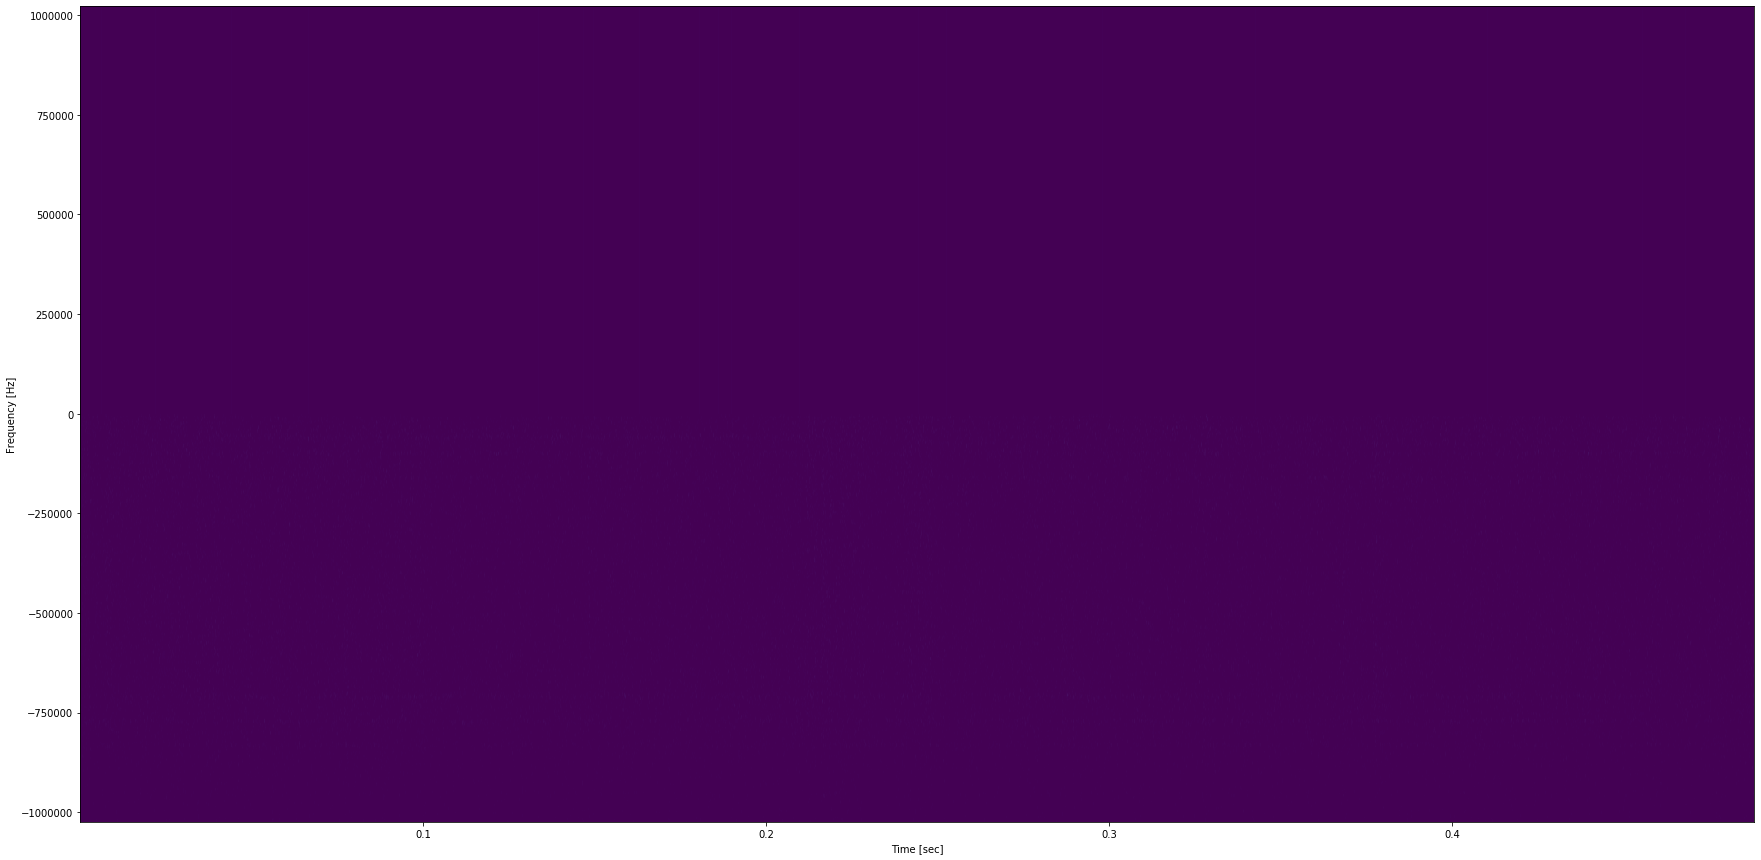

In [16]:
#scipy spectrogram plot
from scipy import signal
iqlen = int(len(iq)/10000)
f, t, Sxx = signal.spectrogram(iq[:1000000], fs=window, nfft= 1024)

print(len(f), len(t), len(Sxx))

#%matplotlib inline
time_a = time.time()
plt.figure(figsize=(30,15))
plt.pcolormesh(t, f, Sxx)
# plt.ylim([0, 1e5])
plt.ylabel('Frequency [KHz]')
plt.xlabel('Time [sec]')
plt.show()

In [12]:
time_b = time.time()
print('Time:',time_b - time_a)

Time: 10.365633010864258
